# Analyzing Data with Pandas and Visualizing Results with Matplotlib


## SMART FARM SENSOR EDA

In [6]:
#pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [8]:
#importing the relevant libraries
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub

In [ ]:
#pip install --quiet git+https://github.com/Funmilayo-Aina/Smart-Farm-Sensor-EDA.git

#### Downloading the dataset

In [74]:
try:
    path = kagglehub.dataset_download("atharvasoundankar/smart-farming-sensor-data-for-yield-prediction")
    print(f"Path to dataset files: {path}")

    # Identify the CSV file within the downloaded directory
    # The dataset typically contains 'sensor_data.csv'
    csv_sensorData = 'sensor_data.csv'
    SensorData = os.path.join(path, csv_sensorData)

    if not os.path.exists(SensorData):
        print(f"Error: {csv_sensorData} not found in the downloaded directory.")
        print("Listing files in the downloaded directory:")
        for file in os.listdir(path):
            print(f"- {file}")
        # Try to find any other CSV file if sensor_data.csv is not present
        csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
        if csv_files:
            SensorData = os.path.join(path, csv_files[0])
            print(f"Using {csv_files[0]} instead.")
        else:
            raise FileNotFoundError("No CSV file found in the downloaded dataset.")

    print(f"Successfully located CSV file: {SensorData}\n")

except Exception as e:
    print(f"Error downloading or locating dataset: {e}")
    exit()

Path to dataset files: C:\Users\funmi\.cache\kagglehub\datasets\atharvasoundankar\smart-farming-sensor-data-for-yield-prediction\versions\1
Error: sensor_data.csv not found in the downloaded directory.
Listing files in the downloaded directory:
- Smart_Farming_Crop_Yield_2024.csv
Using Smart_Farming_Crop_Yield_2024.csv instead.
Successfully located CSV file: C:\Users\funmi\.cache\kagglehub\datasets\atharvasoundankar\smart-farming-sensor-data-for-yield-prediction\versions\1\Smart_Farming_Crop_Yield_2024.csv



In [80]:
# Load the dataset using pandas
try:
    sensorData_df = pd.read_csv(SensorData)
    print("Dataset loaded successfully.\n")
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

Dataset loaded successfully.



## DATA EXPLORATION

In [82]:
# Display the last three rows of the dataset
print("last 3 rows of the dataset:")
print(sensorData_df.tail(3))

last 3 rows of the dataset:
      farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
497  FARM0498  North India    Cotton            15.93     5.72          17.03   
498  FARM0499  Central USA   Soybean            38.61     6.20          17.08   
499  FARM0500  North India     Wheat            30.22     7.42          20.57   

     rainfall_mm  humidity_%  sunlight_hours irrigation_type  ... sowing_date  \
497       288.96       57.87            7.69            Drip  ...  2024-01-02   
498       279.06       73.09            9.60            Drip  ...  2024-01-25   
499        72.61       89.74            5.09             NaN  ...  2024-02-16   

     harvest_date total_days yield_kg_per_hectare  sensor_id   timestamp  \
497    2024-05-09        128              2604.41   SENS0498  2024-04-20   
498    2024-06-04        131              2586.36   SENS0499  2024-03-02   
499    2024-06-29        134              5891.40   SENS0500  2024-05-11   

      latitude  l

In [84]:
# Explore the structure of the dataset
print("Dataset Info (data types and non-null values):")
sensorData_df.info()
print("\n")

# checking for missing values
print("Missing values before cleaning:")
print(sensorData_df.isnull().sum())

Dataset Info (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 n

##### Observation

There are 500 rows and 22 columns in the dataset. The irrigation type and crop disease status contains 150 and 130 missing values respectively. 
The two columns will not be dropped due to their importance in this analysis.

In [86]:
# Separating numerical and categorical columns
numerical_cols = sensorData_df.select_dtypes(include=np.float64).columns
categorical_cols = sensorData_df.select_dtypes(include='object').columns

In [88]:
 # Filling missing numerical values with the mean
for col in numerical_cols:
    if sensorData_df[col].isnull().any():
        mean_val = sensorData_df[col].mean()
        sensorData_df[col].fillna(mean_val, inplace=True)
        print(f"Filled missing values in '{col}' with mean: {mean_val:.2f}")
        print('\n')

# Filling missing categorical values with the mode
for col in categorical_cols:
    if sensorData_df[col].isnull().any():
        mode_val = df[col].mode()[0] # .mode() can return multiple values if ties exist, take the first
        sensorData_df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

Filled missing values in 'irrigation_type' with mode: Sprinkler
Filled missing values in 'crop_disease_status' with mode: Severe


In [90]:
print("\nMissing values after cleaning:")
print(sensorData_df.isnull().sum())


Missing values after cleaning:
farm_id                 0
region                  0
crop_type               0
soil_moisture_%         0
soil_pH                 0
temperature_C           0
rainfall_mm             0
humidity_%              0
sunlight_hours          0
irrigation_type         0
fertilizer_type         0
pesticide_usage_ml      0
sowing_date             0
harvest_date            0
total_days              0
yield_kg_per_hectare    0
sensor_id               0
timestamp               0
latitude                0
longitude               0
NDVI_index              0
crop_disease_status     0
dtype: int64


In [ ]:
print("/n Observation: /n The dataset contains", sensorData_df.shape[0], "rows and", sensorData_df.shape[1], "columns after cleaning.")

## BASIC DATA ANALYSIS

In [92]:
# Compute the basic statistics of the numerical columns
print("Basic statistics of numerical columns:")
print(sensorData_df.describe())

Basic statistics of numerical columns:
       soil_moisture_%     soil_pH  temperature_C  rainfall_mm  humidity_%  \
count       500.000000  500.000000     500.000000   500.000000  500.000000   
mean         26.750140    6.523980      24.675740   181.685740   65.194460   
std          10.150053    0.585558       5.348899    72.293091   14.642849   
min          10.160000    5.510000      15.000000    50.170000   40.230000   
25%          17.890000    6.030000      20.295000   119.217500   51.865000   
50%          25.855000    6.530000      24.655000   191.545000   65.685000   
75%          36.022500    7.040000      29.090000   239.035000   77.995000   
max          44.980000    7.500000      34.840000   298.960000   90.000000   

       sunlight_hours  pesticide_usage_ml  total_days  yield_kg_per_hectare  \
count       500.00000          500.000000  500.000000             500.00000   
mean          7.03014           26.586980  119.496000            4032.92694   
std           1.69167

In [126]:
# Descriptive statistics
print("\n Descriptive Statistics:")
display(sensorData_df.describe())

# Group by Crop Type and compute average Yield
if "Crop_Type" in sensorData_df.columns:
    crop_stats = sensorData_df.groupby("Crop_Type")["Yield"].mean()
    print("\n Average Yield per Crop Type:")
    display(crop_stats)


 Descriptive Statistics:


,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [130]:
# Descriptive statistics
print("\n Descriptive Statistics:")
display(sensorData_df.describe())

# Group by Soil Type and compute average Moisture
if "Soil_Type" in sensorData_df.columns:
    soil_stats = sensorData_df.groupby("Soil_Type")["Moisture"].mean()
    print("\n Average Moisture per Soil Type:")
    display(soil_stats)




 Descriptive Statistics:


,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


### Perform groupings on a categorical column

In [167]:
sensorData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       500 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [132]:

#Group by 'crop_type' if it exists, otherwise use 'Season' or 'Location'.
categorical_group_col = None
if 'crop_type' in sensorData_df.columns:
    categorical_group_col = 'crop_type'
elif 'Season' in sensorData_df.columns:
    categorical_group_col = 'Season'
elif 'Location' in sensorData_df.columns:
    categorical_group_col = 'Location'


In [134]:
if categorical_group_col:
    # Identify a suitable numerical column to aggregate, often 'Yield' or 'Temperature'
    numerical_agg_col = None
    if 'Yield' in sensorData_df.columns:
        numerical_agg_col = 'Yield'
    elif 'Temperature' in sensorData_df.columns:
        numerical_agg_col = 'Temperature'
    elif 'Humidity' in sensorData_df.columns:
        numerical_agg_col = 'Humidity'

    if numerical_agg_col:
        print(f"Mean of '{numerical_agg_col}' grouped by '{categorical_group_col}':")
        print(sensorData_df.groupby(categorical_group_col)[numerical_agg_col].mean())
        print("\n")
    else:
        print("No suitable numerical column found for grouped analysis (e.g., 'Yield', 'Temperature', 'Humidity').")
else:
    print(" Observation: No suitable categorical column found for grouped analysis (e.g., 'Crop_Type', 'Season', 'Location').")

 Observation: No suitable categorical column found for grouped analysis (e.g., 'Crop_Type', 'Season', 'Location').


## DATA VISUALIZATION

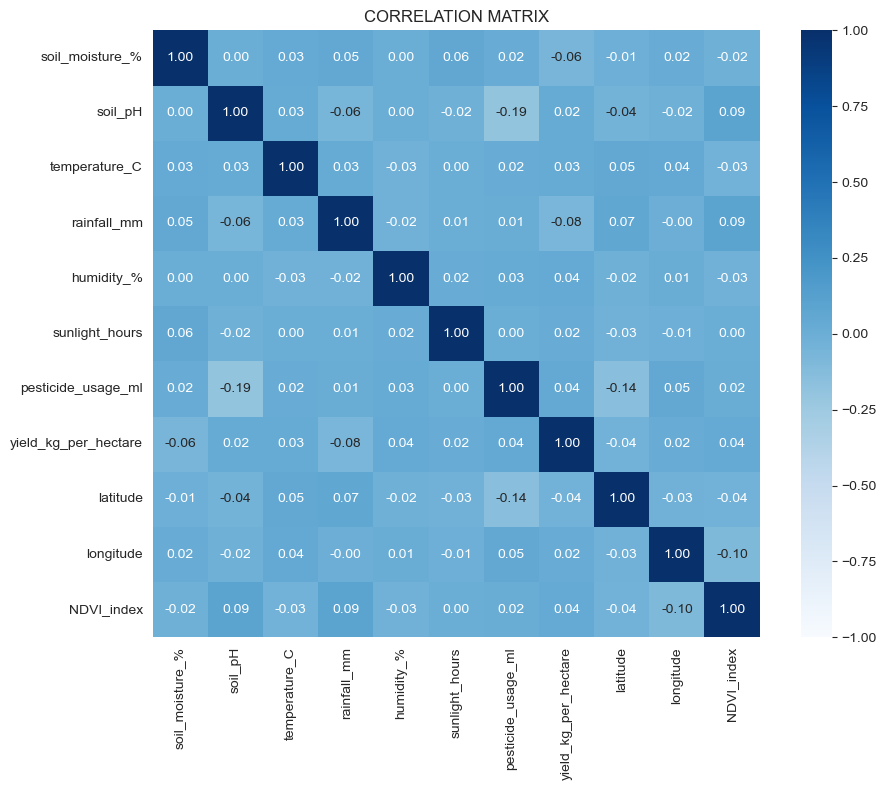

In [211]:
corr_matrix = sensorData_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, square=True)
plt.title('CORRELATION MATRIX')
plt.tight_layout()
plt.show()

#### Line chart showing trends over time 

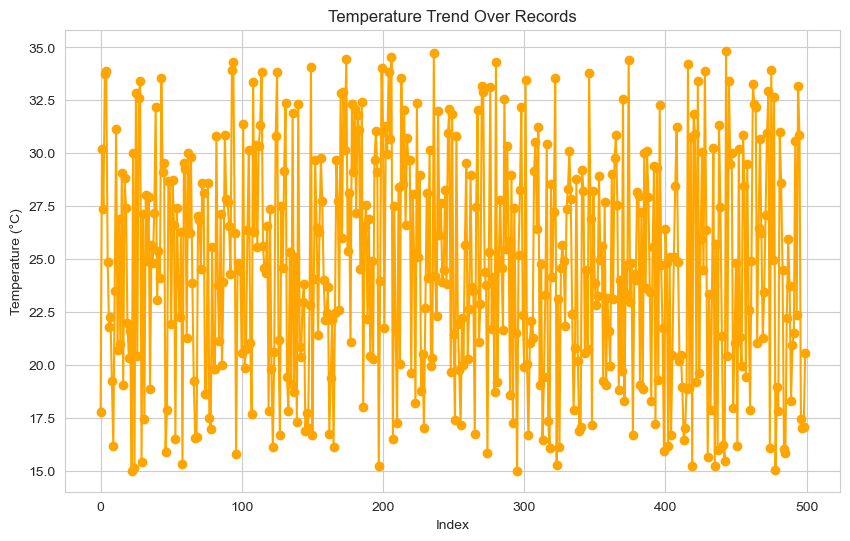

In [154]:
# Line Chart (Temperature trend by index)
plt.figure(figsize=(10,6))
plt.plot(sensorData_df.index, sensorData_df["temperature_C"], color="orange", marker="o")
plt.title("Temperature Trend Over Records")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.show()

print("/n Observations: ")

#### Bar Chart (Average Yield per Crop Type)

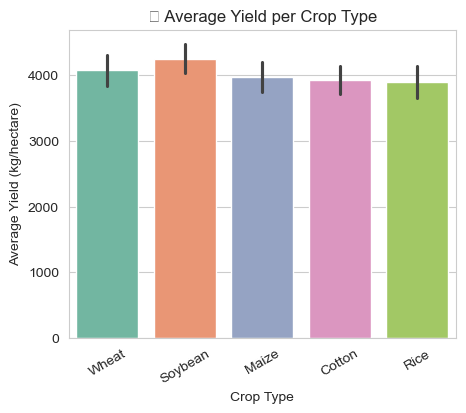

Observation: 
 Average Yield varies significantly across different crops.


In [185]:
#Bar Chart (Average Yield per Crop Type)
if "crop_type" in sensorData_df.columns:
    plt.figure(figsize=(5,4))
    sns.barplot(x="crop_type", y="yield_kg_per_hectare", data=df, estimator="mean", palette="Set2")
    plt.title("🌾 Average Yield per Crop Type")
    plt.xlabel("Crop Type")
    plt.ylabel("Average Yield (kg/hectare)")
    plt.xticks(rotation=30)
    plt.show()
print("Observation: ")
print(" Average Yield varies significantly across different crops.")

#### Histogram (Soil Moisture Distribution)

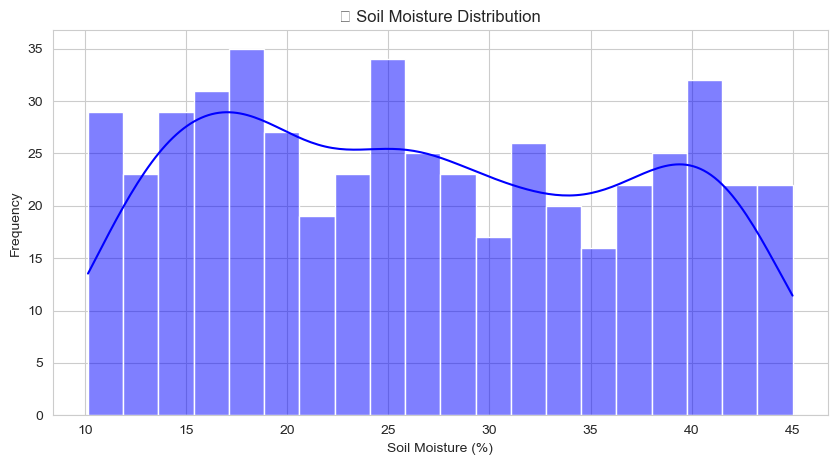

Observations: 
'soil type shows significant impacts on moisture levels (some soils retain more water).


In [196]:
# Histogram (Moisture Distribution)
plt.figure(figsize=(10,5))
sns.histplot(sensorData_df["soil_moisture_%"], bins=20, kde=True, color="blue")
plt.title("💧 Soil Moisture Distribution")
plt.xlabel("Soil Moisture (%)")
plt.ylabel("Frequency")
plt.show()
print("Observations: ")
print("'soil type shows significant impacts on moisture levels (some soils retain more water).")

#### Scatter Plot (Temperature vs Yield, colored by Crop Type)

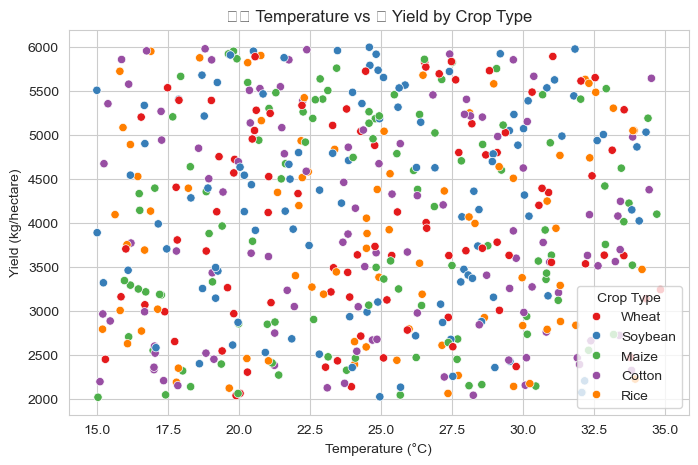

/n Observations: 
 
 Observations:
Scatter plot suggests temperature influences yield differently across crop types.
Temperature distribution shows seasonal/environmental variations.


In [205]:
# Scatter Plot (Temperature vs Yield, colored by Crop Type)
plt.figure(figsize=(8,5))
sns.scatterplot(x="temperature_C", y="yield_kg_per_hectare", hue="crop_type", data=sensorData_df, palette="Set1")
plt.title("🌡️ Temperature vs 📈 Yield by Crop Type")
plt.xlabel("Temperature (°C)")
plt.ylabel("Yield (kg/hectare)")
plt.legend(title="Crop Type")
plt.show()
print("/n Observations: ")
# Findings / Observations
# ------------------------------
print(" \n Observations:")
print("Scatter plot suggests temperature influences yield differently across crop types.")
print("Temperature distribution shows seasonal/environmental variations.")